# **V6 on Synthetic Datatest**

In [1]:
from wrapper import YOLOAPIWrappper
from pipeline import CPPipeline

In [2]:
v6 = "/home/aws_install/conformal_prediction/trainings/v6_small_pretrained/exp/weights/best_ckpt.onnx"
yolov6_detector_synth = YOLOAPIWrappper(v6,file_path='calibv6_synth.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6_synth = CPPipeline(yolov6_detector_synth, test_set='test_synth')

In [4]:
X_train, y_train, labels_train= pipev6_synth.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev6_synth.calibration_and_val(X_train, y_train, labels_train)
conformal_predictor= pipev6_synth.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[1348.74682617 1237.56884766 1620.20532227 1438.43652344]
 [ 881.45123291  982.50598145 1115.69140625 1166.31774902]
 [ 649.581604   1249.57531738  707.28326416 1320.94055176]
 ...
 [ 591.09454346 1044.23034668  842.81427002 1174.17077637]
 [ 639.09924316 1092.83789062  812.71435547 1227.86474609]
 [1568.109375   1080.36865234 1812.66870117 1246.15869141]]
Matched Ground Truths: [[1339. 1240. 1610. 1440.]
 [ 879.  985. 1118. 1164.]
 [ 650. 1254.  708. 1322.]
 ...
 [ 593. 1044.  846. 1172.]
 [ 640. 1095.  811. 1227.]
 [1567. 1086. 1809. 1243.]]
Images: ['/home/aws_install/data/yolo_database/images/test_synth/WSSS_02L_35_23.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/LEMD_32R_35_21.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/RJAA_34R_35_05.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/MDSD_17_35_28.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/LFRS_21_35_05.jpeg', '/home/aws_install/data/yolo_database/i

Marginal coverage: 1.0
Average area: 43479.76953125


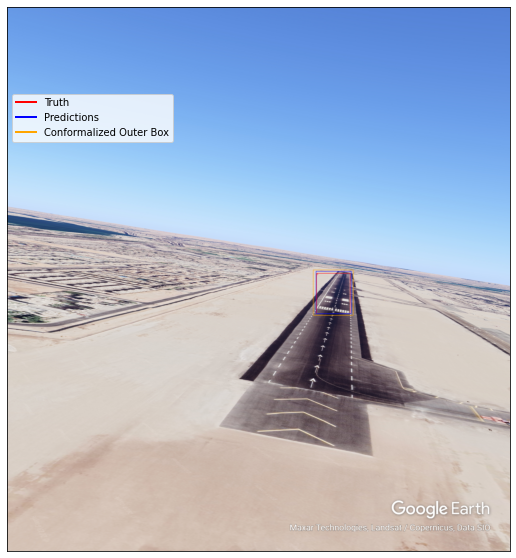

In [5]:
pipev6_synth.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  
)

In [6]:
y_pred_val, y_true_val, box_outer_val, images_val = pipev6_synth.infer_eval_all(X_val, y_val, labels_val, conformal_predictor, visualize = False)

No detections in image /home/aws_install/data/yolo_database/images/test_synth/DAAS_27_35_05.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/OMAD_13_35_02.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/LGSM_27_35_06.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/OMAD_13_35_06.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/DAAS_9_35_02.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/OMAD_13_35_10.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/LGSM_27_35_07.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/LGSM_27_35_08.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/DAAS_27_35_00.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test_synth/OMAD_13_35_09.jpeg
No detections in image /home/aw